# 1. Geometric modeling (Solution)

The __geometric model__ of a robot is a set of equations describing the robot's geometry. This enables for instance to calculate the end-effector's position in the workspace based on the joint angles. There are 2 kinds of geometric models:

- __Direct Geometric Model (DGM)__ : given joint positions, it gives the position of the end-effector (tool, hand, foot, etc.) with respect to the robot's base 

- __Inverse Geometric Model (IGM)__ : given an end-effector position (and orientation), it gives the joint positions 

The joint positions are usually denoted by $q$ and belong to __joint space__. The end-effector's pose is denoted $p$ and belongs to the __task space__, or cartesian space. The geometric model is in fact a mapping between the joint space and the task space. We will introduce these concepts more concretely with examples. 

__Note__: This Notebook contains trigonometry formulas. Take a look at this [cheatsheet](https://tutorial.math.lamar.edu/pdf/trig_cheat_sheet_reduced.pdf) if you feel lost.

# 1R robot

Consider the simple robot arm consisting of 1 revolute joint and 1 link. 

In [3]:
## Author: Sebastien
## Date : 22/06/2020

# Import required packages for this notebook
import numpy as np
from matplotlib import pyplot as plt
import IPython
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# If full github repo has been downloaded locally, uncomment these lines
# from IPython.display import Image
# Image("1dof.png")

# Otherwise click on the link below to see the figure

<!-- For Colab NB -->
[Pendulum image (click here)](https://drive.google.com/file/d/1aSBG3kNHr6wBTUF9SetZ0xkq7uHdxFpx/view?usp=sharing)

One way to describe the robot configuration is to use the joint angle $q\in[-\pi,\pi[$. Knowing $q$, the DGM enables to determine the end-effector's position $p=(x_p,y_p)$ with respect to a fixed reference coordinate frame attached to the base. In this case: the joint space is then the interval $[-\pi,\pi[$ and the task space is the cartesian plane $\mathbb{R}^2$. The DGM equations are

$$
x_p = L \cos(q) \\
y_p = L \sin(q)
$$

where $(x_p,y_p)$ are the cartesian coordinates of the end-effector and $L$ is the length of the link. The same equations can be expressed more compactly as 

$$
p = DGM(q)
$$

where $DGM$ is a function taking a joint angle $q$ as an input and outputs a cartesian position $p=(x_p,y_p)$ expressed in the base frame. It is implemented in python as follow

In [4]:
# Define the link length
L = 1.

# Function corresponding to the direct geometric model
def DGM(q):
    '''
    Input : joint angle (in rad)
    Output : end-effector position (in m)
    '''
    
    x_p = L*np.cos(q)
    y_p = L*np.sin(q)
    
    p = np.array([x_p, y_p])
    
    return p

# Test the DGM and display the result
q = 1.7
p = DGM(q)
print("The end-effector position corresponding to q = "+str(q)+" is : p = "+str(p))

The end-effector position corresponding to q = 1.7 is : p = [-0.12884449  0.99166481]


The IGM solves the converse problem: given an end-effector position (task space), it returns the corresponding position. The IGM is derived by inverting the DGM equations, i.e. by expressing $q$ in terms of $p$. Recall the DGM

$$
x_p = L \cos(q) \\
y_p = L \sin(q)
$$

Assuming $cos(q) \neq 0$ we can divide the second equation by the first equation

$$
\frac{y_p}{x_p} = \frac{\sin(q)}{\cos(q)} = \tan(q)\\
$$

Therefore the IGM reads

$$
q = \tan^{-1}(\frac{y_p}{x_p})
$$

The following function implements the IGM

In [5]:
# Function corresponding to the inverse geometric model
def IGM(p):
    '''
    Input : end-effector position (in m)
    Output : joint angle (in rad)
    '''
    
    x_p = p[0]
    y_p = p[1]
    
    q = np.arctan2(y_p, x_p) % (2*np.pi)
    
    return q

# Test the DGM and display the result
p = np.array([0.3, 0.5])
q = IGM(p)
print("The joint position corresponding to p = "+str(p)+" is : q = "+str(q))

The joint position corresponding to p = [0.3 0.5] is : q = 1.0303768265243125


__Question__ : For which value(s) $q$ do we have $\cos(q) = 0$ ? In this case, can we still use the IGM we derived previously in order to calculate $q$ ? 

__Answer__ : When $q=\pi/2$ or $3\pi/2$. In that case, one cannot the IGM derived above since $\tan^{-1}$ is not defined. But we can see that $x_p=0$ and $y_p = +1$ or $-1$.

Now we summarize the geometric model of the 1R robot into a python class

In [6]:
# Class for the geometric model of the 2R robot
class GeometricModel1R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L=1.):
        ''' 
        Initialize model parameters
        '''
        self.L = L
    
    def DGM(self, q):
        '''
        Input : joint angle (in rad)
        Output : end-effector position (in m)
        '''
        x_p = L*np.cos(q)
        y_p = L*np.sin(q)
        p = np.array([x_p, y_p])
        return p

    def IGM(self, p):
        '''
        Input : end-effector position (in m)
        Output : joint angle (in rad)
        '''
        x_p = p[0]
        y_p = p[1]
        q = np.arctan2(y_p, x_p) % (2*np.pi)
        return q
    
    def animate(self, q):
        '''
        Simulate the robot using DGM 
        '''
        fig = plt.figure()
        ax = plt.axes(xlim=(-self.L -1, self.L + 1), ylim=(-self.L -1, self.L + 1))
        text_str = "One Dof Manipulator Animation"
        link, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        endeff, = ax.plot([], [], 'o', color='pink')
        
        def init():
            link.set_data([], [])
            base.set_data([], [])
            endeff.set_data([], [])
            return link, base, endeff
        
        def animate(i):
            p = self.DGM(q[i])
            x = p[0] 
            y = p[1] 
            link.set_data([0,x], [0,y])
            base.set_data([0, 0])
            endeff.set_data([x, y])
            return link, base, endeff
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=np.shape(q)[0], interval=50, blit=True)

        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))

__Question__ : assume that we are given a sequence of joint positions $q_1, ..., q_n$. We want to calculate the corresponding end-effector trajectory in the task space, namely $p_1, ..., p_n$. Using the `GeometricModel1R` class defined above, fill out the code below to generate this sequence of end-effector positions.

__Answer__ :

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA9wW1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABexZYiE
ADf//vbw/gU2O5jQlxHN6J0zH78VuLo0N73OAAADAAA33SOPPLGIDMBRPF7nsmLmccrt1UoZXhLY
p7N9LuGK9NVbfNwYui+erZSJyzg0kp5T0f2VbDgYU86hnYiu9AAAUc0e5O6HqWXnsbPjbwXP0O9E
eEHh3KKtgcflOOhqZYi6ER0ahYHMZx7psIY+mtwar/BeT0x/UFH9+BsSvAj66Um7/CNmmjj2159x
aEnb5MsIbDdcn2os3WB3p43dbf53+Q70w2zH2PeWZkYpJdb7XblrvjGYU2MG8/LbEw4GDGb4+HhN
D9k4X3ChIsYFTEHefc8R5FaQxyqKcZ+wKrdfBJqT9IS2AN1LnUiw6/mNx/LkBhLfdyPl7wa9N53M
k4dsDXHMZchee7UzGO6oN0NC22cQWjJeBP53JkKsEpQ3WZGXkOs9hEDdwltpnV/A6qB/qRpvSIGs
Lo5QzjiXvy7uiaihhuFA4tpMXPP3YpVPAR15j/D+YwsOvArJyjmLBTulKWSz9JrRtiaNfmoPVqKS
gvWdGzi6zuvwwVPc3MYLCK2pPTSq7peTtDTww2A2vAMbNMZfdWUWspM9DPjPjCF0HkA7pMi6/Q3z
UCVDFlYanRTopdNgQcmaPj5Lbp8fogs1TvVLPDzwhL/nRLTK/zZ5LUs5k4ZUswW8bvSp1Anl4oAq
jDJuny3Rx0BFxHxpJuozSCDN69aGromK4zE7mRFFIEQgNLw+1djPcw1UbstteSBr1fIvepGh6YyY
LiLMW+b4n0mEcOSXkHYsQCLh7hMlko5mJvqXHqtL+vaYo7DdTkDB3uLvn/7FUejb6z/TCQ546OB/
GmD539iOdCb4iH+aq8M+kfLoBQhjVs95+f/cOR1+I3l90g75FaxygeEJ2ghrXX+MNrCPcer0/ia4
v4h2NnOhWWg8dSbtc/Q3dvgYp4f4hf37Pxx9oLSc+35Nb6mhlU6oWOYhaJYhOFR6hjXpkjw6SHG6
PLLD7AGj58zkL2vNOpxtSpviQl03txRHyB+zKuttv6vC6jnFrTZPxL5dj1MDXFgok5I4yjOogfCL
xyNsZo33IycqxmciXrFtuFYjgPQtR8Uj4F/+SyziInkK8sze6MXbyc4QJy45U7lu+baD6s5v/6Kz
B+zyq7l8k/H98XQeEwXdl82CN6a9GjeTWVgdrpP2DXKLAo6XF3C4a7y6LT6ehU7PRcNSCbi1LABf
m13U90BbjCLudGyOa/2GQQsPwaniFu/DQomQOGHWl891PLxAXo+ruewebaCECUTyq/0jgQWn+P4a
ide5xHJNBAZrtGlvJXtMXDrsXWkjpo8mJMPBo0tETkJjqnOQ48cfRdOLsUWBa0gJBPEZ/3vB6Utg
B45SVZK4nmiZrBwPl3gL6OpEGc9jNmAx3uS3cgeXqZbqJPhJwkeNvW5Fh6tnNprqDkkqbM/CZL3W
PfR3TwvkCRPoPG/wWiz2xyuf2Me31WSLasHSj20bGJFVYC0brAU6MBhmmL8jvxkO2hWv1T1/hI3b
1RHAfRpdsmCgo5riSfM6TjiIvt6xx9fYWo9nSdtpTr3lAxqAIY3/lVw1oePLTpurquymGklDo9ec
46lXDKljKcKc7UhTVXPTIN7wViIOQylUCNSsKwwl4owIMo7vBVJRela2EC0ALx7fTtKUzS9EGgzr
fauMJS5CMNAib0Wv5m5LRqLhKQCVh0fux5zRIs+VsQ5ggKct6T0+g0uzVhlTQIsevn7uKg6pl+E/
sZMuyPM2QJtwah9fWGIbtvblsO3Rjw9SeTfoE7f0OgCnlHVbwV0eAOPdflvVDthaLRfEMwn941ip
WC7wn0+6y+0z60D2ywqE9SRBl5TC6Qs6IiABGbTLa2BFos0BAYlGk4Chk6sdhDgwG+UIlJGqBalb
OmHtMjbR/xZQmzzGq/8qMrTG1HEpcJJ9I5khT9NwvzaTIaYDrbWGcaDMmDe/6YVGJpTQlEq4+2GL
/IJh4kZTuXPvQe8vRB9JezSCYCwuxeyhhWYGx17s9xpYeBmT4yrf4y9F1/N+ZEubZvmsaviz3WOV
Lqhr5WG6IozoJrl8Mn9sfsx/qr6FOvbf8G44ZOXr/9SDYWQ1H1Ra9pqJl1+dG+FrklUTPrbFe1OE
xZkzxkGCSEca8V+iRXab9tj5mze9bsvaKld1+66vrrZXbsOfoV0IKLo+sB3v64DCxvFKzxptMv4N
yYwR+7Nd//kZQ6kKRKknWnnxr0NvKMGlaJT6OF+45/mGe4k+CIXWyapZi9yy3bw2RGAc4jmbfBjj
xqqqQUhWfeB30Z/qgYzZdhx46HbzlVm55IGFp1MiFfS5ZcZ9OZH07/qOGnHvoWLvpJWJttxod3JQ
/TGXMUTvP6b01avDYoyDhimQH6feAEk4QI/vYpiCS1PtW4VcPmXeskNvw1/oKZkuOE9jIl+Pm8m5
BHOX/BkICPX+aFV1HI6zDGahL6cbqIPZJm2+JniWKNLaL19gs+OyVruvanjKcQb+VXP51CxZcZAS
MV/oTIkc8rRi9nodDI6ZoAzS+lIOO0b+fiayjcPTTyfzpOWUeha0fPBN2qgXZV+ZIyj4sFvRFh1y
VQqbYqPoHTchbSUEyynpHzuU9T5EJLe2s6V70ml2xqB+vbxB90dtEkA5182Yj1xVpsBk3U0jK0CG
z57UBK7qJIJsCDJ6NUU4z+9xXv/dPIN1SOHg4JOpsVgQyuZLjENWLUwL3DbVycE+Ioky8MSLytrs
ztY5lgxoF0mQa1buGYWJwmr9IjEKY840p4ITQbIdlSyI277G65Mvroc9GObbvweJ+MHhXSv4Bp0u
eZAC/b1mtcRyFFbhZXfbXy0o7mN93yajiJNm6tXPSwAV5ztt13qF31lfZ/Ffiw1lKNpqQ0/GnCkY
QC4pmjim1SGOS/suwcWuf

Text(0, 0.5, 'y_p (m)')

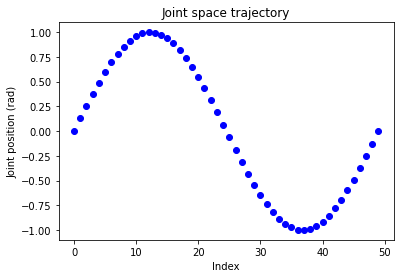

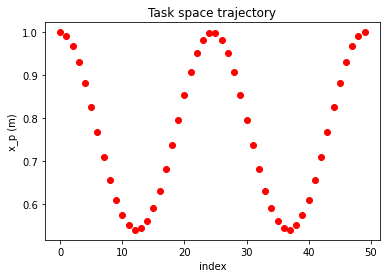

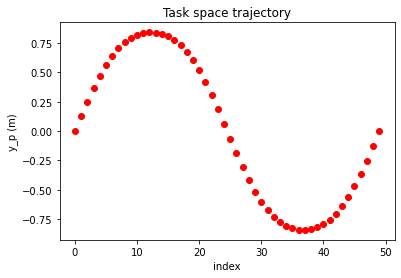

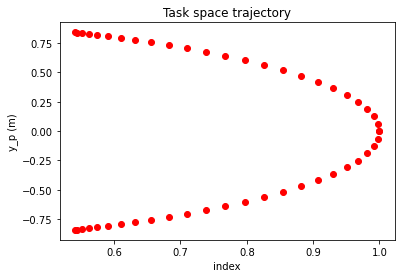

In [7]:
# Number of steps in the trajectory
N = 50

# Define the joint space trajectory 
q = np.sin(np.linspace(0,1,N)*2*np.pi)

# This plots the sequence q_1, ..., q_n
plt.plot(q, 'bo')
plt.title("Joint space trajectory")
plt.xlabel("Index")
plt.ylabel("Joint position (rad)")

# Create `GeometricModel1R` object
geom1R = GeometricModel1R(L)

# Animate the sequence of joint positions
geom1R.animate(q)

# Calculate the sequence p_1, ..., p_n 
p = np.zeros((2,N))
for i in range(N):
    p[:,i] = geom1R.DGM(q[i])

# Plot the sequence p_1, ..., p_n 
    # x_p
plt.figure()
plt.plot(p[0,:], 'ro')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("x_p (m)")
    # y_p
plt.figure()
plt.plot(p[1,:], 'ro')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("y_p (m)")
    # p=(x_p,y_p)
plt.figure()
plt.plot(p[0,:], p[1,:], 'ro')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("y_p (m)")

# 2R robot

Now you will have to derive the DGM and IGM of the 2R planar robot (2 links, 2 revolute joints) shown below.

In [8]:
# If full github repo has been downloaded locally, uncomment these lines
# from IPython.display import Image
# Image("2dof.png")

# Otherwise click on the link below to see the figure

<!-- For Colab NB -->
[2R robot (click here)](https://drive.google.com/file/d/1Pdow1aMbsOGwISPOVpTHg5suiEBJ0y4z/view?usp=sharing)

__Question__ : derive the DGM of the 2R robot, i.e. express $p=(x_p,y_p)$ in terms of the joint positions $(q_1,q_2)$. What happens in the DGM when $q_1 = q_2 = 0$ ?

Hint: use [projections](https://en.wikipedia.org/wiki/Rotation_of_axes)

__Answer__ : By projecting on $ \vec{x} $ and $\vec{y}$ axes, it can be seen that

$$
x_p = L_1 \cos(q_1) + L_2 \cos(q_1 + q_2) \\
y_p = L_1 \sin(q_1) + L_2 \sin(q_1 + q_2)
$$

To convince yourself of that, the trick is to define a new frame attached to joint $2$ with axes $\vec{x}^*,\vec{y}^*$ such that $\vec{x}^*$ is aligned with the first link. The new frame's origin (say $(x_2,y_2)$) can be expressed ___with respect to the base frame___ as

$$
x_2 = L_1 \cos(q_1) \\
y_2 = L_1 \sin(q_1)
$$

And the end-effector's coordinates with ___respect to the new frame___ are

$$
x_p^* = L_2 \cos(q_2) \\
y_p^* = L_2 \sin(q_2)
$$

We need to express everything w.r.t. the base frame. So let's now express $\vec{x}^*$ with respect to the base frame axes $ \vec{x}, \vec{y} $ :

$$
\vec{x}^* = \cos(q_1) \vec{x} + \sin(q_1) \vec{y}
$$

Similarily, the new axis $\vec{y}^*$ reads

$$
\vec{y}^* = -\sin(q_1) \vec{x} + \cos(q_1) \vec{y}
$$

Injecting these expressions of $\vec{x}^*,\vec{y}^*$ into the expression of $x^*_p, y^*_p$ one obtains the expression of $x_p^*,y_p^*$ in terms of the original base frame's axes $\vec{x},\vec{y}$ :

$$
x_p^* = L_2\cos(q_2) \cos(q_1) - L_2 \sin(q_2)\sin(q_1) = L_2 \cos(q_1 +q_2)\\
y_p^* = L_2\cos(q_2) \sin(q_1) + L_2 \sin(q_2)\cos(q_1) = L_2 \sin(q_1 +q_2)
$$

(using classical trigonometry formulas). ___Since everything is now expressed in the same frame___ (the base frame), we obtain the result by adding up the components :

$$
x_p = x_2 + x_p^* = L_1 \cos(q_1) + L_2 \cos(q_1 + q_2)\\
y_p = y_2 + y_p^* = L_1 \sin(q_1) + L_2 \sin(q_1 + q_2)
$$ 

When $q_1=q_2=0$ we have $x_p = L_1 + L_2$ and $y_p = 0$. 

__Question__ : derive the IGM of the 2R robot. Bonus question: How many solutions $(q_1,q_2)$ are there given some $p$ ? (There are $3$ cases depending on $p$)

Hint: There exist at least $2$ methods
- A geometric one using the [law of cosines](https://www.mathsisfun.com/algebra/trig-cosine-law.html), 
- An algebraic one (play around with the DGM equations)

__Answer__ : Now we need to express $q_1,q_2$ in terms of $x_p,y_p$. There are several solutions:

>__Solution 1 : geometric solution__

Using the [law of cosines](https://www.mathsisfun.com/algebra/trig-cosine-law.html) we have 

$$
x_p^2 + y_p^2 = L_1^2 + L_2^2 - 2L_1 L_2\cos(\pi-q_2)\\
\cos(q_2) = \frac{x_p^2+y_p^2-L_1^2-L_2^2}{2L_1 L_2}
$$

from which we derive $q_2$ using $\cos^{-1}$. Moreover observing that

$$
q_1 = \gamma - \beta
$$

where $\gamma ,\beta$ are represented in the figure below 

In [9]:
# If full github repo has been downloaded locally, uncomment these lines
# from IPython.display import Image
# Image("2dof-sol.png")

# Otherwise click on the link below to see the figure

<!-- For Colab NB -->
[2R solution (click here)](https://drive.google.com/file/d/1q82KZ51uJAlyBpQoOtnKkSWrY0XQ2p6z/view?usp=sharing)

We have 
$$
\gamma = \tan^{-1}\left(\frac{y_p}{x_p}\right)
$$ 
$$
\beta = \tan^{-1}\left(\frac{L_2 \sin(q_2)}{L_1 + L_2 \cos(q_2)}\right)
$$

Therefore the IGM is given by 
$$
q_1 = \tan^{-1}\left(\frac{y_p}{x_p}) - \tan^{-1}(\frac{L_2 \sin(q_2)}{L_1 + L_2 \cos(q_2)}\right)
$$
$$
q_2 = \cos^{-1}\left(\frac{x_p^2+y_p^2-L_1^2-L_2^2}{2L_1 L_2}\right)
$$

>__Solution 2 : algebraic solution__

Observe that from the DGM equations we have

$$
x_p^2 + y_p^2 = L_1^2 \cos^2(q_1) + L_2^2 \cos^2(q_1 + q_2) + 2 L_1 L_2 \cos(q_1)\cos(q_1+q_2) \\
            + L_1^2 \sin^2(q_1) + L_2^2 \sin^2(q_1 + q_2) + 2 L_1 L_2 \sin(q_1) \sin(q_1 + q_2)
$$

which can, using classic trigonometry formulas, be simplified into 

$$
x_p^2 + y_p^2 = L_1^2 + L_2^2 + 2 L_1 L_2 \cos(q_2)
$$

from which we can deduce $q_2$. The expression of $q_1$ is derived as in the geometric solution. 

__Question__ : How many solutions $q=(q_1,q_2)$ are there given some $p=(x_p,y_p)$ ? 

Hint: There are $3$ cases depending on the value of $p$

__Answer__ :

Note that depending on the value of $p=(x_p,y_p)$, there can be $0$, $1$, or $2$ solutions. For instance
- If $x_p^2 + y_p^2 > L_1^2 + L_2^2$, there is no solution (the arm can't stretch)
- If $x_p^2 + y_p^2 = L_1^2 + L_2^2$, there is a unique solution ($q_2=0$ and $q_1=\tan^{-1}(\frac{y_p}{x_p})$)
- If $x_p^2 + y_p^2 < L_1^2 + L_2^2$, there are two conjugate solutions

__Question__ : Write the GeometricModel2R class (complete the code below)

__Answer__ :

In [10]:
# Class for the geometric model of the 2R robot
class GeometricModel2R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L1=1., L2=1.):
        ''' 
        Initialize model parameters
        '''
        
        self.L1 = L1
        self.L2 = L2
        
    def DGM(self, q):
        '''
        Input : joint positions q=(q1,q2) (in rad)
        Output : end-effector position (in m)
        '''
        q1 = q[0]
        q2 = q[1]
        x_p = self.L1*np.cos(q1) + self.L2*np.cos(q1 + q2)
        y_p = self.L1*np.sin(q1) + self.L2*np.sin(q1 + q2)
        p = np.array([x_p, y_p])
        return p

    def IGM(self, p):
        '''
        Input : end-effector position (in m)
        Output : joint positions q (in rad)
        '''
        x_p = p[0]
        y_p = p[1]
        q2 = np.arccos( (x_p**2 + y_p**2 - self.L1**2 - self.L2**2) / (2*self.L1*self.L2) )
        q1 = ( np.arctan2(y_p, x_p) - q2 )# % (2*np.pi)
        q = np.array([q1, q2]) # % (2*np.pi)
        return q
        
    def animate(self, q):
        '''
        Simulate the robot using DGM 
        Input : sequence of joint positions [q1, ..., q2]
        '''
        fig = plt.figure()
        ax = plt.axes(xlim=(-self.L1 -1, self.L1 + 1), ylim=(-self.L2 -1, self.L2 + 1))
        text_str = "2R robot animation"
        link1, = ax.plot([], [], lw=4)
        link2, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        endeff, = ax.plot([], [], 'o', color='pink')
        
        def init():
            link1.set_data([], [])
            link2.set_data([], [])
            base.set_data([], [])
            endeff.set_data([], [])
            return link1, link2, base, endeff
        
        def animate(i):
            p = self.DGM(q[:,i])
            x = p[0] 
            y = p[1] 
            link1.set_data([0,self.L1*np.cos(q[0,i])], [0,self.L1*np.sin(q[0,i])])
            link2.set_data([self.L1*np.cos(q[0,i]),x], [self.L1*np.sin(q[0,i]),y])
            base.set_data([0, 0])
            endeff.set_data([x, y])
            return link1, link2, base, endeff
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=np.shape(q)[1], interval=25, blit=True)

        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))
        
# Create geometry
geom2R = GeometricModel2R()

# Test DGM
q = np.array([np.pi/4, np.pi/4])
p = geom2R.DGM(q)
p = geom2R.DGM(np.array([0.,0.]))
print("The end-effector position corresponding to q = "+str(q)+" is : p = "+str(p))

# Test IGM
p = np.array([1.9,0.01]) #np.array([1.4, 1.1])
q = geom2R.IGM(p)
print("The joint position corresponding to p = "+str(p)+" is : q = "+str(q))

The end-effector position corresponding to q = [0.78539816 0.78539816] is : p = [2. 0.]
The joint position corresponding to p = [1.9  0.01] is : q = [-0.62977347  0.63503658]


__Question__ : Now generate trajectories of your choice in the joint space (for instance you can define sines as for the 1R example, but feel free to try out different trajectories). Plot them as done before, and calculate and plot the corresponding endeffector trajectory.

__Answer__ :

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABQkm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABRhZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8oYJVUBByf4O5YtZ6qGZLtT17Eogp
jCCTv3ncxYbd/iUaemh41E8s/58OpW3qZfUSgOEKBL/FwAAVkkNY/TuUMdzGZjXRqm///is42csw
2GRsDZlgfqbtbKDrl33R3UyHXGK4fjlQtRTi+K+sRCXJWD4gwfaScWKb8rN5RSQH/EzL0te9XXON
dLxmUR06/2kVxy4b4OXQuteBVqWFTWsdirxF2PG+YHZkVBgwnjR//Q//7OVm/tTIIPeL613X/PeG
8WB0k2MrC45/VBIpvXfvIJX1MPO9HOvjSPvVM0ybNrLvueP0V7fiyJ/IDB3QV4uVn5D26lBWOnwH
sZrGCF6hsNdgDMwPmw8B06nMptgn+b8RODf6aLGAgPpbcCAm4DvfCwZajWi49r3DxbBJ8AlgYM/t
7likpzIDUiPHrHav3saDRG4wEYMUoVsUDd3lxcg//Civ0IB1S0m6vV82PkpYXibr+uXrZ+wgt+2I
r+vdFpsNFzIfkUEFwLu6/44VRrUAPosNTnagb//VYak/f9PRGOKhQ8B1BleI6LFqQsJWgktylkTb
FjqVRA4OMrgVvmzGh4F/MwyO/KJePcD6bfjukh9c1XfC6p5dgvdxV4julYNk6hhVNj6/PtiQh6AV
tFPKR/WHt8e7K7IxYZxwJWoVPboF9iKDU7Nu+sP7A8j+lo27IZdCT6addBpucFSfuRUxAAxqTUkU
4AxqxVQB2Zc3i3i72ReYUpidOvrN9MkuuxXCQSFkdBzSZCrrv2eqVHBkt9hmMbrFGX76voKWkbPl
Gof9dpH0RLjn/uuENrbuEbQxoRqyqYFbXH8tHqAAsP106iOOpY20D1ha9uigcUl1uxxvKNOT4j8N
6MDIKOKFUoxFIS6skAimkJmSFyZvxWDEZNGthdjXjh2nzqn1V+0Xrfc3p8Z+ioeUnF9hrGPvuNOM
qf+GXEby2dQRXxEwaNGX7S8O9xXqrom6tc6FMuea6kVJPigqTkfPdC7tmyQynU1E2Q7gziC2w+vn
2ujikvQCN4Bm8Pc16KOg9oLx92Vh468hZkDETRNYY0lzVlXnheALrwCceLBv1WBqQLiyAOQtL7La
1s+qbv+2KpIByLZvfphHbNIVq0BMGesoHi+hUkbHX+/lX4UebS6PzphGQpDoOkqYEo5idoJOOMnl
S9eWFNM0xqL8okAu1Y2YVnwrBoHc5uuZ3D1LGdD5YHLF7V5Zp+6FNsbGV5aXsHV+5mEiYLY11LUw
4hspLghtRnNLCzNkRwecbsCLYJY2+LnfRQxcK84FKOL/i5gdObsUdxYFGegqDktma4pWQx/DHf6p
DC2D8q5CxvxT9B3keB0J+Y1tO59FF5yjySAq0IrlWVRRAn6T08t2dZSmJCQRfq+cX9tSDYYgnl2D
a+zz+UmbRmS4VdpBkJTpyCvrqGcpmGhe8dkp93zTLRIoueB9asJCqT+9x7HfHBhQRlb3VxxHdo8R
X3WuUSb0z2ItoSrwJ1OC0rjq+CM+956Mpkv8bAVJzv1jpI7dUfLDGRqybdjZEW4P7vB355+cBvBy
kvOajh5EL+rHS5N85qVHoTXvZq33MyIPAT70AIgtrgvdUl9ZiEM9UUyzDhe5+Fhy0oIEOk3u/ctY
KYl1rL/PCXojPfDdipUsFWUyrjfiLVIAiNMVDCWhzuRpArncydxzPX71LXxPZP8136CviFvuo+Ge
+rkv9SN/2YEkH13Fod2ThkWrDlSEBqrSQ89nQrrn0hSSqlgt+TO8e7tvjn1Gpx3IYD9UXj6cIGxn
tYH+fmkL7eAyU/NWa5SBa6ZHrPpb68B07Ssj4ggrEjdw4/6pfoKtftIjteBmF1lo1UOHBoFkrzHc
GLTNpAGot44rpXFz2E29RQWKrkOcoGzesGEJRk5e8G2lTpwKh46ipX/9VXko9b5Cu8dr+HgehGpJ
Qf2Ay2yv7GCQlOqObatWv/EkqBVexoud3ZWAs7RKHH0Wy48RAJ0b9yuQuHPJ5kkqk4zIPZUNf/pF
mTXbsOYMvFUfmltKWzt2IWgGRVmohQX616dxbstQemPs644JVfBYcbCWXv7kJKiiw3A5nW8YwqhZ
VGp6RGWN7hWGgqptXcrECQ3J2QGSC1HiwSBvJCY4y7ji5SRL4KEGmM5fNwZvh06jX5+hRpBS1xGU
CVJQLHRJbeR8z/S2yHU4nSm6dX7LeonWD8JBSSiBBNU7xmrYaBbR5xoRpDb2Gylj/6JWmLE+bjWz
UjPnLCHNL+P/tsQiXXR+DmfCt+g83DvcoHIoxL+5w2JeI6e7QNsWOHGtrqyfxapZ8ANdPqQEuuRf
8sJZ/D351pqKKx6hxwGBZ886z5IRIeQk6XWDrS3iWY7oJbH2z1n5NBrZk3GZj7YwBk4S/72kD4bj
B0MH9O6gnJ2Db5C1kkFqpAgsBkj+Mi1AQeyNw+b1CLa31/quEXzPAkrleEnFk8PXmou+qN874oe0
j1XURwrEa6L9Lz/ByINtfOD2s5eamvA0kuMS/GmcHCUIuspDwjGO8z8jNI1gL6TfDiVWs+//kPaE
tZEtc6OF+t1oG4JOdzTyFAvxSKjimq+VxLaXkrv6GyoB6joccmazjaAJv5zOCnVsSYwREppKPpqo
+Y+PYA/1sNYCpnMVeXHIEKLAAHLPcPpO9tT9KXOXx5goZeLEQs7yzsRu4iSpm3rcFepBolmkB37k
5IH3d8C0DgZB116YCgGCBzvzSwarJW6clLa2rg+wB4FcJzFeQj12BMDas4bEAGsRC7v2SnFYfdjR
c+ND6t6IJ3C/BYfAEp+4xeMXNKKPrtqv2d/XXR5+Ypx4FSmm1+bcJNJN5tVU0uAG7gwNhDGy1y5E
iVCfSHfbIbZHuhK2aEpfP

Text(0, 0.5, 'y_p (m)')

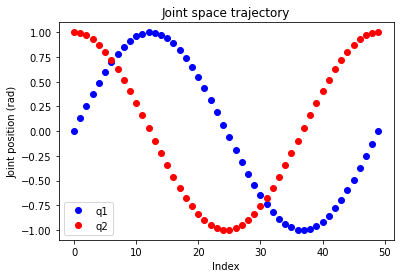

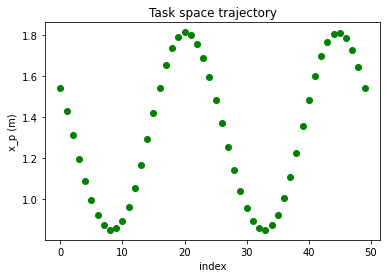

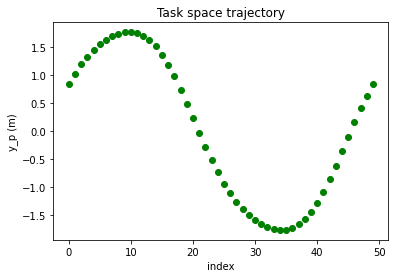

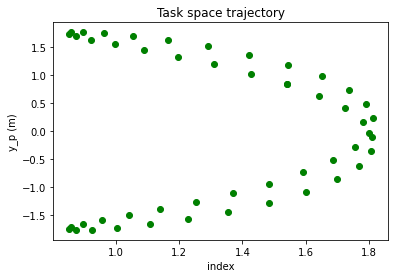

In [11]:
# Number of steps in the trajectory
N = 50

# Define the joint positions sequences
q1 = np.sin(np.linspace(0,1,N)*2*np.pi)
q2 = np.cos(np.linspace(0,1,N)*2*np.pi)
q = np.array([q1, q2])

# This plots the sequence q1_1, ..., q1_n and q2_1, ..., q2_n on the same plot
plt.plot(q1, 'bo', label='q1')
plt.plot(q2, 'ro', label='q2')
plt.title("Joint space trajectory")
plt.xlabel("Index")
plt.ylabel("Joint position (rad)")
plt.legend()

# Create `GeometricModel1R` object
L1 = 1.
L2 = 1.
geom2R = GeometricModel2R(L1,L2)

geom2R.animate(q)

# Calculate the sequence p_1, ..., p_n 
p = np.zeros((2,N))
for i in range(N):
    p[:,i] = geom2R.DGM(q[:,i])

# Plot the sequence p_1, ..., p_n 
    # x_p
plt.figure()
plt.plot(p[0,:], 'go')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("x_p (m)")
    # y_p
plt.figure()
plt.plot(p[1,:], 'go')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("y_p (m)")
    # p=(x_p,y_p)
plt.figure()
plt.plot(p[0,:], p[1,:], 'go')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("y_p (m)")

__Question__ : The other way around, now plot an end-effector trajectory you choose, calculate and plot the corresponding joint trajectories. 

__Answer__ :

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABG9W1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABPWZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8oYJVUBByf4O5YtZ6qGZLtT17Eogp
jCCTv3ncxYbd/iUaemh41E8s/58OpW3qZfUSgOEKBL/FwAAVkkNY/TuUMdzGZjXRqm///is42csw
2GRsDZlgfqbtbKDrl33R3UyHXGK4fjlQtRTi+K+sRCXJWD4gwfaScWKb8rN5RSQH/EzL0te9XXON
dLxmUR06/2kVxy4b4OXQuteBVqWFTWsdirxF2PG+YHZkVBgwnjR//Q//7OVm/tTIIPeL613X/PeG
8WB0k2MrC45/VBIpvXfvIJX1MPO9HOvjSPvVM0ybNrLvueP0V7fiyJ/IDB3QV4uVn5D26lBWOnwH
sZrGCF6hsNdgDMwPmw8B06nMptgn+b8RODf6aLGAgPpbcCAm4DvfCwZajWi49r3DxbBJ8AlgYM/t
7likpzIDUiPHrHav3saDRG4wEYMUoVsUDd3lxcg//Civ0IB1S0m6vV82PkpYXibr+uXrZ+wgt+2I
r+vdFpsNFzIfkUEFwLu6/44VRrUAPosNTnagb//VmXqwK3zP9hwVOGAXyKmVtuM6QsJPLOUsibOg
qVUDg56YjNZgVvm4ceUPAv5mGR35RLx7gfTb8d0usfvj5CnFWRJ/zTzUpThJnjVkQWr84Y92TJsU
opbjPYV8mUjcDSPWL1XisPA3Z9D0O8IFmWxa//ur34d8z3JHDSyOPoP/TTroNNzgqT9yKmIAGNSa
kinAGNWKqAOzLm8Wv3eyLzClMTp19Zvpkl12K4SCQsjoOaTIVdd+z1So4MlvsMxjdYoy/fV9BS0j
Z8o1D/rtI+iJcc/91whtbdwjaGNCNWVTAra4/lK9QAFh+unURx1LG2gesLXt0UDikut2ON5RpyfE
fhvRgZBRxQqlGIpCXVkgEU0hMyQuTN+KwYjJo1sLsa8cO0+dU+qv2i9b7m9PjP0VB/44vsNYx99x
pxlT/wy4jeWzqCK+ImDRoy/aXh3uK9VdE3VrnQplzzXUipJ8UFScj57oXds2SGU6momyHcGcQW2H
18+10cUl6ARvAM3h7mvRR0HtBePuysPHXkLMgYiaJrDGkuahSAp5VOD6yBzxYN+qwNSBcWQByFpf
ZbWtn1Td/2xVJAORbN79MI7ZpCtWgJgz1lA8X0KkjY6/38q/CjzaXR+dMIyFIdB0lTAlHMTtBJxx
k8qXrywppmmNRflEgF2rGzCs+FYNA7nN8rCVwDX+Yg56xXu0vLNP3QptjYyvLS9g6v3MwkTBbGup
amHENlJcENqM5pYWZsiODzjdgRbBLG3xc76KGLhXnApRxf8XMDpzdijuLAoz0FQclszXFKxyjbcB
bB+AAkCwN0biXyMpd/vBezhFWtp3PoovOUeSQFWhFcqyqKIE/SenluzrKUxISCL9Xzi/tqQbDEE8
uwbX2efykzaMyXCrtIMhKdOQV9dQzlMw0L3jslPu+aZaIUhpwPrVhIVSf3uPY744MKCMre6uOI7t
HiK+61yiTemexFtCVeBOpwWlcdXwRn3vPRlMl/jYCpOd+sdJHbqj5YYyNWTbsbIi3B/d4O/PPzgN
4OUl5zUcPIhf1Y6XJvnNSo9Ca97NW+5mRB4CfegBEFtcF7qkvrMQhnqimWYcL3PwsOWlBAh0m937
lrBTEutZf54S9EZ74bsVKlgqymVcb8RapAERpioYS0OdyNIFc7mTuOZ6/epa+J7J/fO/QV8Qt91H
wz31cl/qRv+zAkg+u4tDuycMi1YcqQgNVaSHns6Fdc+kKSVUsFvyZ3j3dt8c+o1OO5DAfqi8fThA
2M9rA/z80hfbwGSn5qzXKQLXTI9Z9LfXgICsu4fEEFYkbuHH/VL9BVr9pEdrwMwustGqhw4NAsle
Y7gxaZtIA1FvHFdK4uewm3qKCxVchzlA2b1gwjlYHJkXLSp04FQ8dRUr/+qryUet/DLzUrjaUs2H
3kL6Ol9XQMsePHMFWep2GWdmP/RmySHK/yU/PgLJHuNuYrfo0brqkOw3RVNgKqOYrh7SxYz3H3C2
KZNDYHfftpq5xSuaI9qHLvLqnOppnbNo7uIPLaKlSlCJdsuS64towL6LPVJMPkhlpU2pytXy9wYY
KFdte5WVwFO9SZVwaTrtXcyTQST//gqyfcjxYIqxD08Vq9xxcpI6TFCDTGc0PSAhZo032rI5zKd5
0Btdmauv3Wi+y/xK8PP7dWE8gw29xbTM+AS5F8wfhIILsQFrU2yCShDTHZkyU8eAqQYbIts/jqaZ
t28DsPmsz3z9t7pZp/9tiES66srYH1d+fg2az6fIpFGJlQmexLxHT3RtYaSQpgZNhJ/FqlnwA10/
nYt+5F/ywln8PfePGVvoF+dnDzJW0us+SESHkJDu54yd8pPWM/JbH2z1nxuX65g6+u6pZwQMnCYD
LiEKq0RRDB/TuoJyBASeOxJ2T+GDDgnfn84X3Og+WUfZH/a9jcPf/N1vzC5iTdlCFnzuXPyxdmgv
I3R6ejgNZwukXct6wxo+PE5GtqjY9aeHQQV4GUALKMS97YaR/H1/ACl74NKvpPWPqn23ZbrBXdUV
gxVk6CXQtgFY2tgRKWcRTE8+z0krudAMCBaZX+hXhx5qy2YTAWKiQHEghtkP3SiDcAx4dS2jqvHn
brgb3P1lA/mbYMEChGIANV68ye6AlzqUGCdnLOWLBy9v2TKbRAvQuWPTnagm0YvGLRoprabraX2c
DplnN0vjHDTlrTHKeJ2e/z1DUAPUpmB3s9F+b6XlGck+3Vohz87RWn1Ku5mtAbaSh62HVqVqkqr+
qBlr7f6+WcAmQrt9LqzfpH1p7C3HMzfVZJfm/Y7PyKQa1G2LpWyQn5fh7b1EAHG8QI9BhnlbQsv1
rdY95rpIy/b5zUc5iFR4e

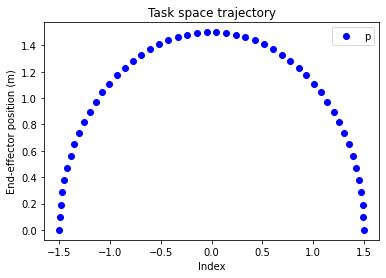

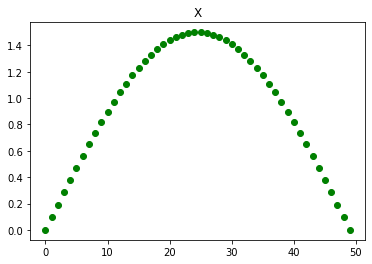

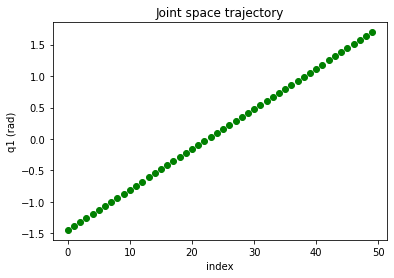

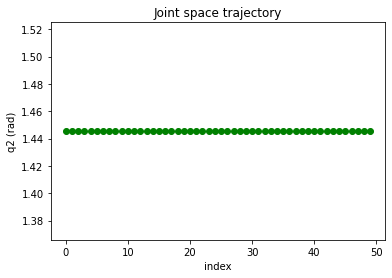

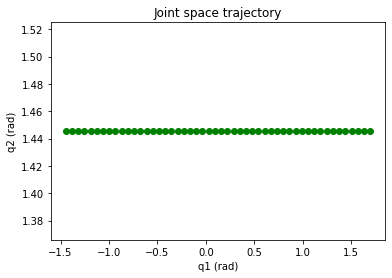

In [12]:
# Number of steps in the trajectory
N = 50

# Define a half circle of radius r in task space
r = 1.5
t = np.linspace(0,1,N)
x_p = r*np.cos(t*np.pi)
y_p = r*np.sin(t*np.pi)
p = np.array([x_p, y_p])

# This plot task space sequence p1,...,pn
plt.plot(x_p, y_p, 'bo', label='p')
plt.title("Task space trajectory")
plt.xlabel("Index")
plt.ylabel("End-effector position (m)")
plt.legend()

plt.figure()
plt.plot(p[1,:], 'go')
plt.title("X")

# Create `GeometricModel1R` object
L1 = 1.
L2 = 1.
geom2R = GeometricModel2R(L1,L2)

# Calculate the sequence q_1, ..., q_n 
q = np.zeros((2,N))
for i in range(N):
    q[:,i] = geom2R.IGM(p[:,i])

# Plot the sequence of q's 
    # q1
plt.figure()
plt.plot(q[0,:], 'go')
plt.title("Joint space trajectory")
plt.xlabel("index")
plt.ylabel("q1 (rad)")
    # q2
plt.figure()
plt.plot(q[1,:], 'go')
plt.title("Joint space trajectory")
plt.xlabel("index")
plt.ylabel("q2 (rad)")
    # q=(q1,q2)
plt.figure()
plt.plot(q[0,:], q[1,:], 'go')
plt.title("Joint space trajectory")
plt.xlabel("q1 (rad)")
plt.ylabel("q2 (rad)")

# Animate 
geom2R.animate(q)

In this notebook we've introduced the concepts of joint space and task space. We derived and implemented the geometric model of the 1R and 2R robots. This description is "static", in a sense that it doesn't take into account velocities. The next notebook introduces the kinematic model, which relates velocities in the joint space to end-effector velocities in the task space.